In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
housing_df = pd.read_csv('housing.csv')

In [3]:
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


**1-How many Rows and Columns are in the data?**

In [4]:
housing_df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41.0,21.0,52.0,52.0,NaN
total_rooms,880,7099,1467,1274,1627
total_bedrooms,129.0,1106.0,190.0,235.0,280.0
population,322.0,2401.0,496.0,558.0,NaN
households,126,1138,177,219,259
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600,358500,352100,341300,342200
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


In [5]:
Rows = len(housing_df.axes[0])
Columns = len(housing_df.axes[1])

In [6]:
print("Number of Rows: ", Rows)
print("Number of Columns: ", Columns)

Number of Rows:  20640
Number of Columns:  11


In [7]:
housing_df.shape

(20640, 11)

**2- How many NULL values are in each column?**

In [8]:
NumOfNULLvalues = housing_df.isna().sum()

In [9]:
NumOfNULLvalues

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

**3- What is the Column that contains the most NULL Values?**

In [10]:
print("The Column that Contains the most NULL Values is total_bedrooms")

The Column that Contains the most NULL Values is total_bedrooms


**4- What is the Average number of total rooms and total bedrooms?**

In [11]:
avgOfTotalRooms = housing_df['total_rooms'].mean()
avgOfTotalBedrooms = housing_df['total_bedrooms'].mean()

In [12]:
print("The Average of total Rooms =" , avgOfTotalRooms)
print("The Average of total Bedrooms =" , avgOfTotalBedrooms)

The Average of total Rooms = 2635.7630813953488
The Average of total Bedrooms = 539.9201040741211


**5- What are the Different Ocean Proximity Categories that we have ?**

In [13]:
oceanProximityCategories = housing_df['ocean_proximity'].value_counts()

In [14]:
oceanProximityCategories

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

**6- What is The most Frequent Ocean Proximity ?**

In [15]:
mostFreq =  housing_df['ocean_proximity'].max()

In [16]:
mostFreq

'NEAR OCEAN'

**7- What is The Average median income overall ?** 

In [17]:
avgMedian = housing_df['median_income'].mean()

In [18]:
print("The Average Median income =" , avgMedian)

The Average Median income = 3.9394028646562207


**8- What is the average population for houses in a block where the median income is more than $80,0000?**

In [19]:
housing_df.loc[housing_df['median_income'] >= 8.0000, 'population'].mean()

1260.6320610687023

**9- What is the maximum and minimum number of total rooms for houses that are located inland?**

In [20]:
dataFrame = housing_df.loc[housing_df['ocean_proximity'] == 'INLAND']

In [21]:
dataFrame['total_rooms'].max()

39320

In [22]:
dataFrame['total_rooms'].min()

2

**10- True or False:**

In [23]:
#1-Houses that are located near bay have the highest average median house value. (Hint: Use `groupby()`)
housing_df.groupby(['ocean_proximity'])['median_house_value'].max()

ocean_proximity
<1H OCEAN     500001
INLAND        500001
ISLAND        450000
NEAR BAY      500001
NEAR OCEAN    500001
Name: median_house_value, dtype: int64

In [24]:
#The average housing median age for houses located near ocean  is more than houses located inland
housing_df.groupby(['ocean_proximity'])['housing_median_age'].mean()

ocean_proximity
<1H OCEAN     29.356692
INLAND        24.243496
ISLAND        42.400000
NEAR BAY      37.666960
NEAR OCEAN    29.365725
Name: housing_median_age, dtype: float64

*then both questions are True*

# Preprocessing Data #

**1- Search for any missing Values**

In [39]:
missing_values = housing_df.isnull().sum()
missing_values

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [40]:
missing_values['housing_median_age']

258

**2- Fill the missing values in each column with its mean or median**

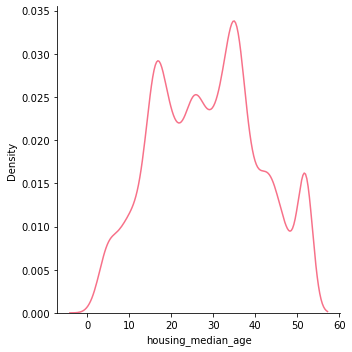

In [45]:
sns.set_palette("husl")
sns.displot(data=housing_df , x="housing_median_age", kind="kde")

In [46]:
housing_df["housing_median_age"].fillna(housing_df["housing_median_age"].mean() , inplace = True)

In [47]:
housing_df["housing_median_age"].isnull().sum()

0

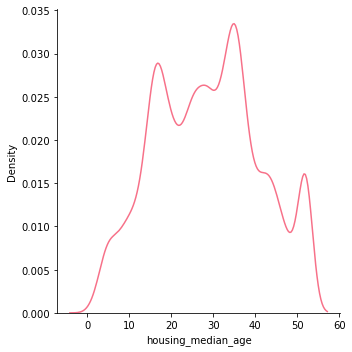

In [48]:
sns.color_palette()
sns.displot(data = housing_df , x = "housing_median_age" , kind = "kde")

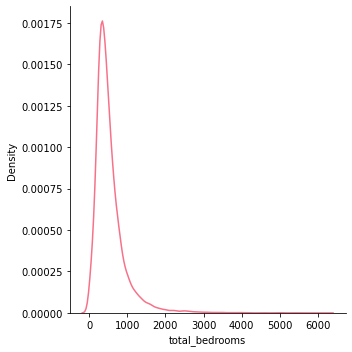

In [50]:
sns.set_palette("husl")
sns.displot(data=housing_df , x = "total_bedrooms", kind="kde")

In [65]:
housing_df["total_bedrooms"].fillna(housing_df["total_bedrooms"].median() , inplace = True)

In [66]:
housing_df["total_bedrooms"].isnull().sum()

0

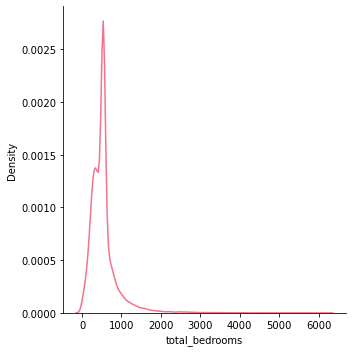

In [67]:
sns.set_palette("husl")
sns.displot(data=housing_df , x = "total_bedrooms", kind="kde")

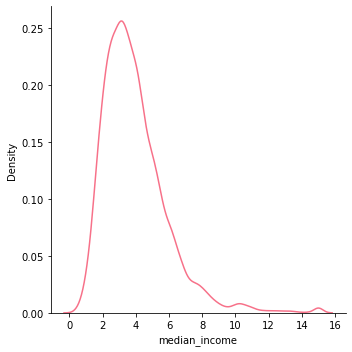

In [60]:
#median_income 
sns.set_palette("husl")
sns.displot(data=housing_df , x = "median_income", kind="kde")

In [61]:
housing_df["median_income"].fillna(housing_df["median_income"].mean() , inplace = True)

In [63]:
housing_df["median_income"].isnull().sum()

0

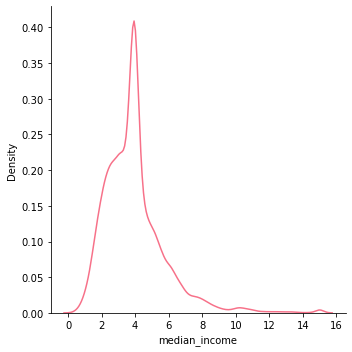

In [64]:
#median_income 
sns.set_palette("husl")
sns.displot(data=housing_df , x = "median_income", kind="kde")

<AxesSubplot:xlabel='gender', ylabel='count'>

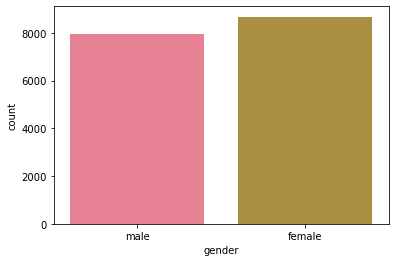

In [69]:
sns.countplot(data=housing_df , x = "gender")

In [72]:
housing_df["gender"].mode()[0]

'female'

In [79]:
fill_list = ['male', 'female']
housing_df["gender"] = housing_df["gender"].fillna(pd.Series(np.random.choice(fill_list , size = len(housing_df.index))))

<AxesSubplot:xlabel='gender', ylabel='count'>

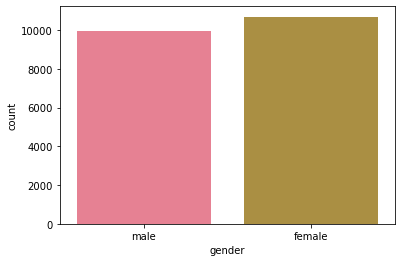

In [80]:
sns.countplot(data=housing_df, x="gender")

# Identifying and Handling Outliers #

**Use Boxblot to check outliers**

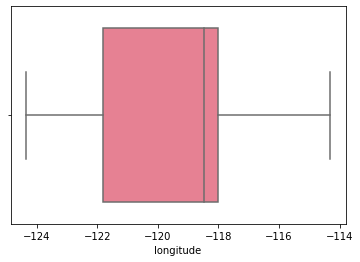

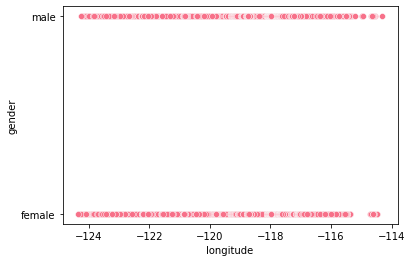

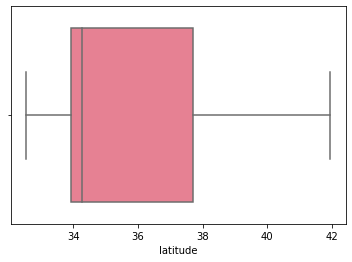

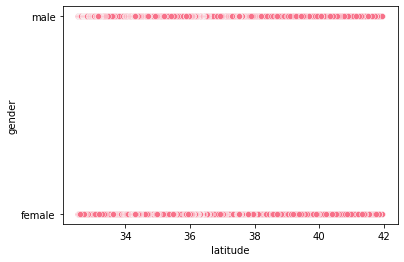

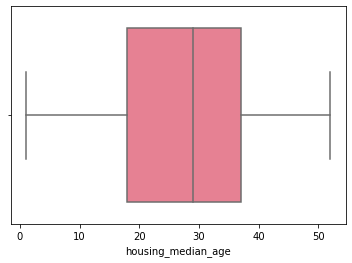

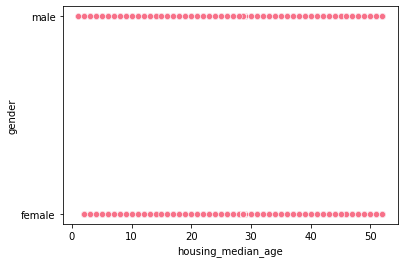

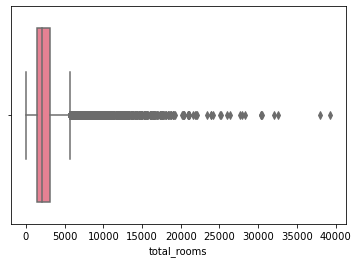

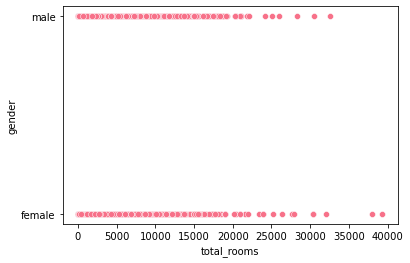

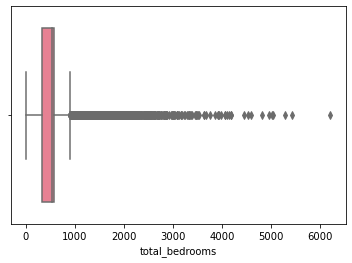

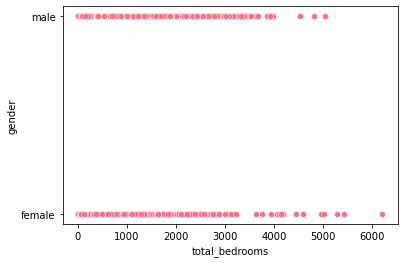

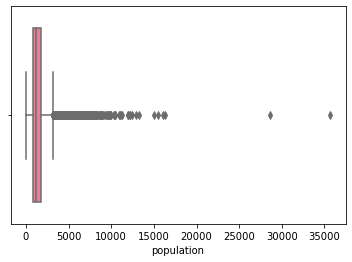

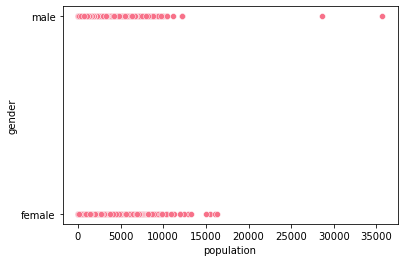

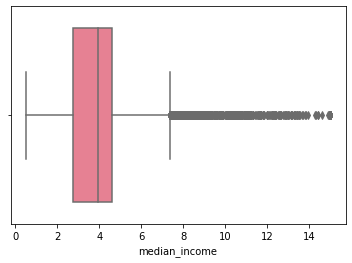

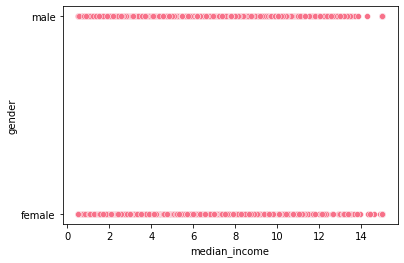

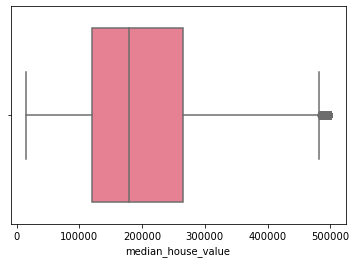

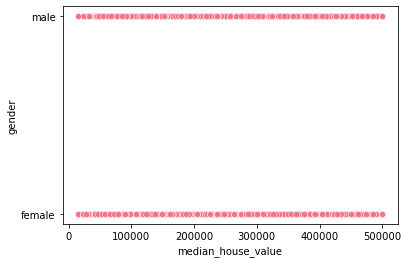

In [86]:
for col in housing_df.columns:
    if housing_df[col].dtype != 'object':
        bp = sns.boxplot(data = housing_df, x = col)
        plt.show()
        sp = sns.scatterplot(data = housing_df, x = col, y=housing_df["gender"])
        plt.show()

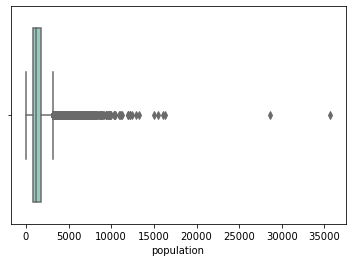

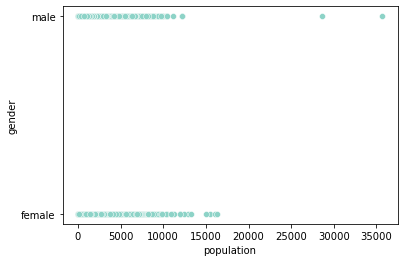

In [87]:
sns.set_palette("Set3")
bp = sns.boxplot(data = housing_df, x = "population")
plt.show()
sp = sns.scatterplot(data = housing_df, x = "population", y=housing_df["gender"])
plt.show()

In [94]:
housing_df.drop(housing_df[housing_df['population']>10000].index, axis = 0, inplace =True)

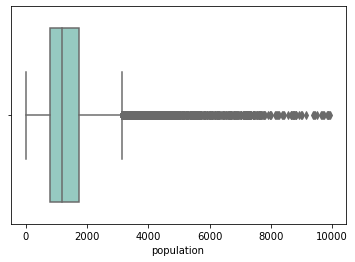

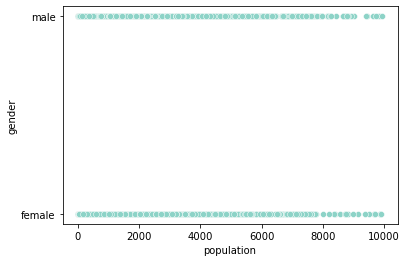

In [95]:
sns.set_palette("Set3")
bp = sns.boxplot(data = housing_df, x = "population")
plt.show()
sp = sns.scatterplot(data = housing_df, x = "population", y=housing_df["gender"])
plt.show()

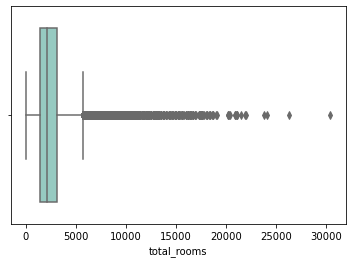

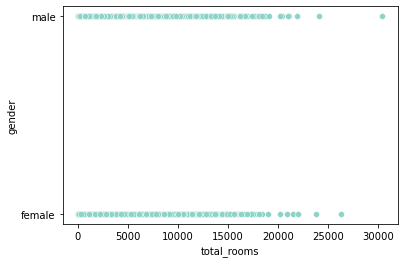

In [96]:
sns.set_palette("Set3")
bp = sns.boxplot(data = housing_df, x = "total_rooms")
plt.show()
sp = sns.scatterplot(data = housing_df, x = "total_rooms", y=housing_df["gender"])
plt.show()

In [97]:
housing_df.drop(housing_df[housing_df['total_rooms']>20000].index, axis = 0, inplace =True)

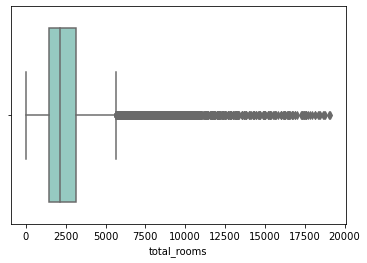

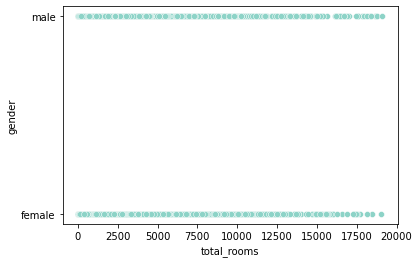

In [98]:
sns.set_palette("Set3")
bp = sns.boxplot(data = housing_df, x = "total_rooms")
plt.show()
sp = sns.scatterplot(data = housing_df, x = "total_rooms", y=housing_df["gender"])
plt.show()

# Scale Data using Min-Max Scaler #

In [112]:
# generate 1000 out_df points randomly drawn from an exponential distribution
original_housing_df = np.random.exponential(size = 1000).reshape(-1, 1)

scaler = MinMaxScaler()
#scale the out_df between 0 and 1
scaled_housing_df = scaler.fit_transform(original_housing_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled housing_df')

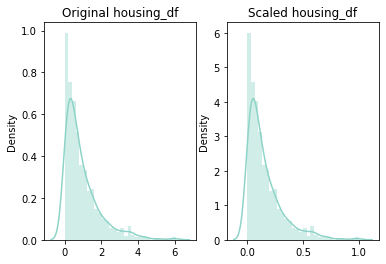

In [113]:
fig, ax=plt.subplots(1,2)
sns.distplot(original_housing_df, ax=ax[0])
ax[0].set_title("Original housing_df")
sns.distplot(scaled_housing_df, ax=ax[1])
ax[1].set_title("Scaled housing_df")

# Remove Duplicates #

In [114]:
housing_df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
59,-122.29,37.82,2.000000,158,43.000000,94.0,57,2.5625,60000,NEAR BAY,female
61,-122.29,37.82,49.000000,135,29.000000,86.0,23,6.1183,75000,NEAR BAY,female
73,-122.29,37.81,46.000000,12,4.000000,18.0,7,0.4999,67500,NEAR BAY,female
81,-122.27,37.81,52.000000,210,56.000000,183.0,56,1.1667,112500,NEAR BAY,female
82,-122.28,37.81,52.000000,340,97.000000,200.0,87,1.5208,112500,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20578,-121.81,38.84,28.676283,352,539.920104,238.0,NaN,2.8542,275000,INLAND,male
20583,-122.00,38.73,28.676283,371,539.920104,208.0,NaN,3.8750,137500,INLAND,female
20620,-121.48,39.05,28.676283,198,539.920104,151.0,NaN,4.5625,100000,INLAND,male
20625,-121.52,39.12,28.676283,102,539.920104,29.0,NaN,4.1250,72000,INLAND,female
